In [1]:
# Importation des librairies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
# Chargement du dataset
dataset = pd.read_csv('./Fichiers de données/network-logs.csv')

In [3]:
# Affichage des 5 premières lignes du dataset
dataset.head()

,REMOTE_PORT,LATENCY,THROUGHPUT,ANOMALY
0,21,15.942875,16.202998,0
1,20,12.666451,15.899084,1
2,80,13.894550,12.958008,0
3,21,13.620813,15.459475,0
4,21,15.705485,15.339565,0


In [4]:
# Dimensions du dataset
dataset.shape

(405, 4)

In [5]:
# Affichage des informations sur le dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REMOTE_PORT  405 non-null    int64  
 1   LATENCY      405 non-null    float64
 2   THROUGHPUT   405 non-null    float64
 3   ANOMALY      405 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.8 KB


In [6]:
# Recherche des valeurs dupliquées
dataset.duplicated().sum()

98

In [7]:
# Suppression des valeurs dupliquées
dataset.drop_duplicates(inplace=True)

In [8]:
# Taille du dataset après suppression des valeurs dupliquées
dataset.shape

(307, 4)

In [9]:
# Affichage des statistiques descriptives du dataset
dataset.describe()

,REMOTE_PORT,LATENCY,THROUGHPUT,ANOMALY
count,307.000000,307.000000,307.000000,307.000000
mean,65.019544,14.438806,15.361489,0.029316
std,107.987622,1.506990,1.270218,0.168966
min,20.000000,4.752613,4.126232,0.000000
25%,21.000000,13.403351,15.197528,0.000000
50%,21.000000,15.015778,15.528906,0.000000
75%,80.000000,15.456936,15.841982,0.000000
max,443.000000,23.339868,24.350407,1.000000


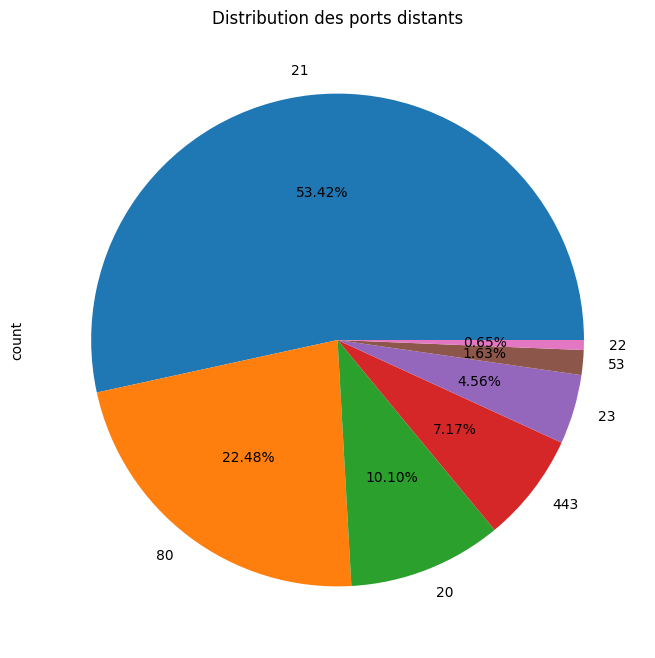

In [10]:
# Taux de la distribution des ports 
plt.figure(figsize=(8, 8))
dataset.REMOTE_PORT.value_counts().plot.pie(autopct=  '%1.2f%%')
plt.title('Distribution des ports distants')
plt.show()

In [11]:
# Nombre d'occurrences des fichiers légitimes et malveillants
occ = dataset['ANOMALY'].value_counts()
occ

ANOMALY
0    298
1      9
Name: count, dtype: int64

In [12]:
ratio_fichiers = occ/len(dataset.index)
print(f"Ratio de la présence d'activité normale: {ratio_fichiers[0]}\nRatio de la présence d'activité anormale: {ratio_fichiers[1]}")

Ratio de la présence d'activité normale: 0.9706840390879479
Ratio de la présence d'activité anormale: 0.029315960912052116


## DEFINITION DU TARGET ET DES FEATURES

In [13]:
# Extraction du feature et du target
X = dataset.drop('ANOMALY', axis=1)
y = dataset['ANOMALY']

In [25]:
# Modélisation
def modeles_resultats(X_train, y_train, X_test, y_test, name_model):
    
    # 6. Entraînement des modèles
    name_model.fit(X_train, y_train)

    # 7. Prédiction avec les modèles
    y_pred = name_model.predict(X_test)
    
    try:
        
        # 8. Évaluation des performances des modèles
        dico_indices_performances = {"Exactitude: " : accuracy_score(y_test, y_pred), "Précision: " : precision_score(y_test, y_pred, zero_division=0), "Recupération: ": recall_score(y_test, y_pred, zero_division=0), "Score F1: ": f1_score(y_test, y_pred, zero_division=0), "Matrice de confusion": confusion_matrix(y_test, y_pred)}
        for _ in dico_indices_performances:
            print(f'{_}: \n {dico_indices_performances[_]}')

    except AttributeError:
        pass

In [26]:
# Graphique de performances des modèles
def plot_performances(X, y, name_model):
        y_pred = name_model.predict(X)
        plt.figure(figsize=(8, 6))
        plt.scatter(y, y_pred, color='green')
        plt.plot(np.arange(0, 1500, 10), np.arange(0, 1500, 10), 'r-')
        plt.xlabel('Valeurs réelles')
        plt.ylabel('Valeurs prédites')
        plt.grid()

## MODÉLISATION: Entrainement et prédiction

In [ ]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

## EVALUATION

In [27]:
# Modèle avec l'algorithme KNN
model_Knn = KNeighborsClassifier(n_neighbors=10)
modeles_resultats(X_train, y_train, X_test, y_test, model_Knn)
# plot_performances(X_train, y_train, model_Knn)
# plt.title("Performances du modèle à l'entrainement")


Exactitude: : 
 0.989247311827957
Précision: : 
 0.0
Recupération: : 
 0.0
Score F1: : 
 0.0
Matrice de confusion: 
 [[92  0]
 [ 1  0]]


Text(0.5, 1.0, 'Performances du modèle au test')

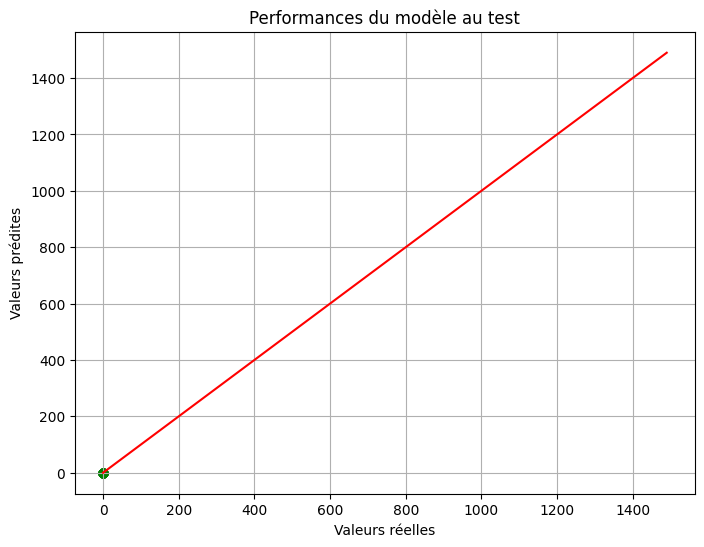

In [28]:
plot_performances(X_test, y_test, model_Knn)
plt.title("Performances du modèle au test")

In [29]:
# Modèle avec l'algorithme Decision Tree
model_DecisionTree = DecisionTreeClassifier()
modeles_resultats(X_train, y_train, X_test, y_test, model_DecisionTree)
# plot_performances(X_train, y_train, model_DecisionTree)
# plt.title("Performances du modèle à l'entrainement")

Exactitude: : 
 0.967741935483871
Précision: : 
 0.25
Recupération: : 
 1.0
Score F1: : 
 0.4
Matrice de confusion: 
 [[89  3]
 [ 0  1]]


In [30]:
# Modèle avec l'algorithme Decision Tree
model_NaiveBayes = GaussianNB()
modeles_resultats(X_train, y_train, X_test, y_test, model_NaiveBayes)
# plot_performances(X_train, y_train, model_NaiveBayes)
# plt.title("Performances du modèle à l'entrainement")

Exactitude: : 
 0.989247311827957
Précision: : 
 0.5
Recupération: : 
 1.0
Score F1: : 
 0.6666666666666666
Matrice de confusion: 
 [[91  1]
 [ 0  1]]
